In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [21]:
def extract_data(data):
    X = []
    labels = []

    for key, value in data.items():

        # class_type = key.split('-')[1]
        pool = key.split('-')
        if pool[1] == 'oil':
            class_type = pool[1] + '-' + pool[2]
        else:
            class_type = pool[1]

        embedding = value[0]

        X.append(embedding)
        labels.append(class_type)

    return np.array(X), np.array(labels)

In [22]:
json_file_path = "search_paintings.json"
data = load_json(json_file_path)

In [23]:
X, labels = extract_data(data)

In [24]:
labels

array(['oil-baroque', 'oil-baroque', 'oil-impressionism', 'oil-baroque',
       'oil-impressionism', 'oil-baroque', 'oil-baroque', 'oil-baroque',
       'oil-baroque', 'oil-rococo', 'oil-renaissance', 'oil-romanticism',
       'oil-romanticism', 'oil-renaissance', 'oil-rococo',
       'oil-renaissance', 'oil-renaissance', 'oil-renaissance',
       'oil-impressionism', 'oil-renaissance', 'oil-renaissance',
       'oil-renaissance', 'sketching', 'oil-romanticism', 'oil-rococo',
       'oil-rococo', 'oil-renaissance', 'oil-romanticism',
       'oil-romanticism', 'oil-renaissance', 'oil-rococo', 'oil-rococo',
       'oil-romanticism', 'sketching', 'sketching', 'oil-romanticism',
       'oil-rococo', 'oil-rococo', 'oil-romanticism', 'sketching',
       'oil-romanticism', 'oil-rococo', 'oil-impressionism',
       'oil-impressionism', 'oil-romanticism', 'oil-baroque',
       'oil-impressionism', 'oil-baroque', 'oil-baroque',
       'oil-impressionism', 'oil-impressionism', 'oil-impressionism'

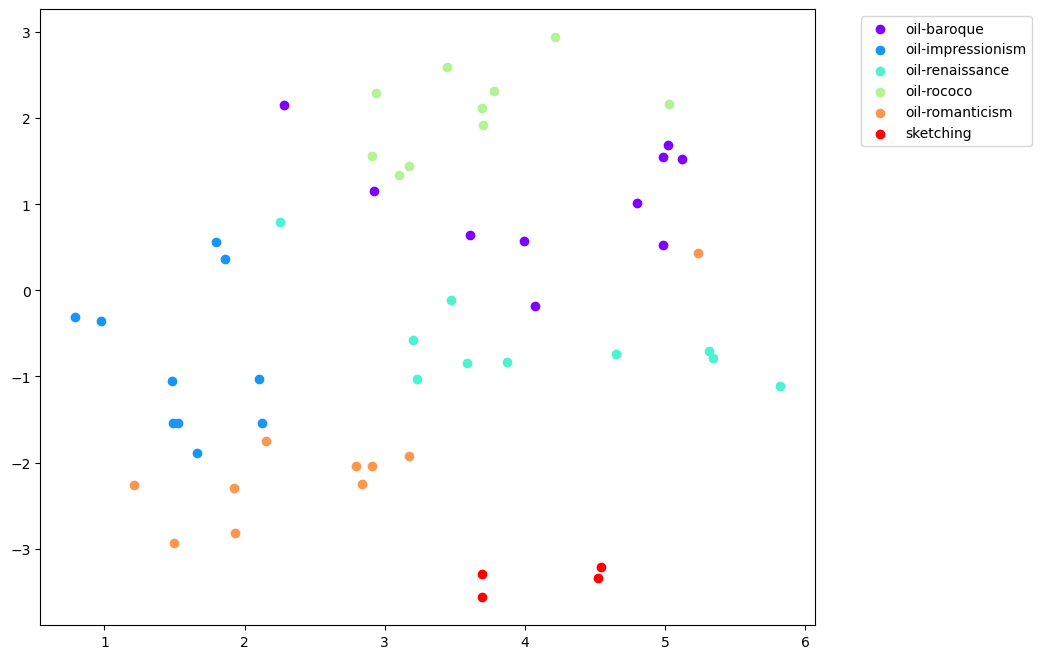

In [32]:
plt.figure(figsize=(10, 8))

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
        mask = labels == label
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=label, color=colors[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [33]:
text_json_file_path = "search_text_paintings.json"
text_data = load_json(text_json_file_path)

In [35]:
X_new = []
labels_new = []

for key, value in data.items():

    # class_type = key.split('-')[1]
    pool = key.split('-')
    if pool[1] == 'oil':
        class_type = pool[1] + '-' + pool[2]
    else:
        class_type = pool[1]

    embedding = value[0]

    X_new.append(embedding)
    labels_new.append(class_type)

In [36]:
for keyt, valuet in text_data.items():
    X_new.append(valuet[0])
    labels_new.append(keyt)

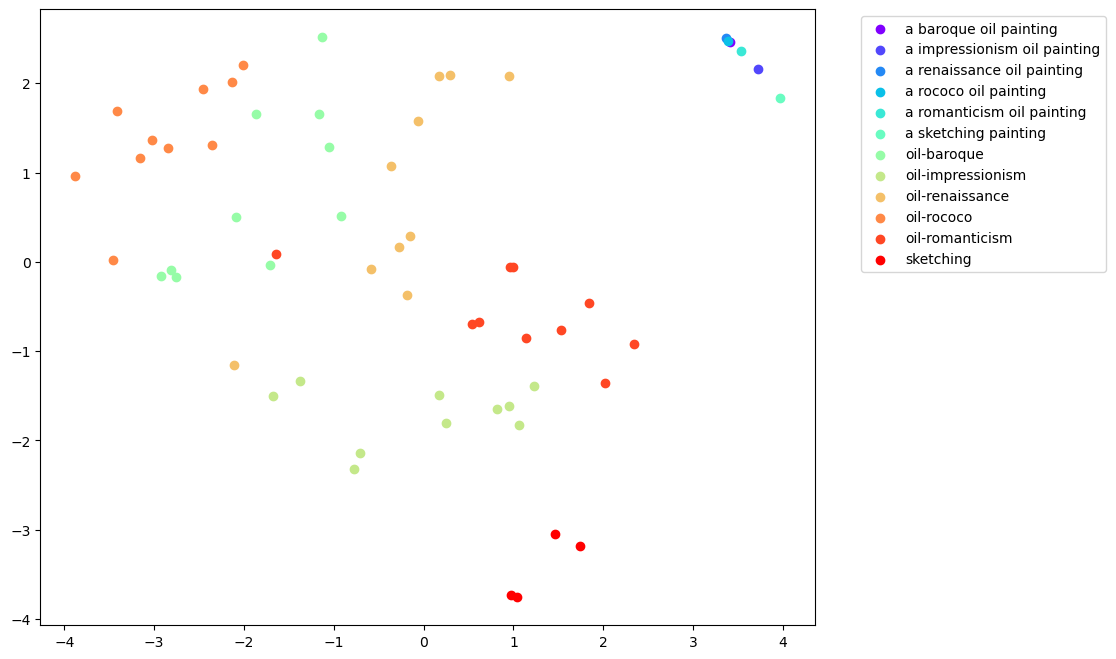

In [38]:
plt.figure(figsize=(10, 8))

X_new = np.array(X_new)
labels_new = np.array(labels_new)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_new)

unique_labels = np.unique(labels_new)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
        mask = labels_new == label
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=label, color=colors[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()